In [1]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt


In [2]:

gray_house = cv2.imread("houses.jpg",0)
gray_sudoku = cv2.imread("sudoku.jpg",0)


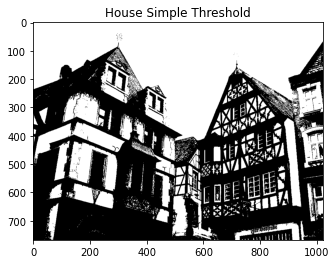

In [3]:
Threshold = 127
House1 = np.zeros((768,1024), np.uint8)
for i in range(768):
    for j in range(1024):
        
        
        if gray_house[i,j] > Threshold:
            House1[i,j] = 255       
        else:
            House1[i,j] = 0
plt.title("House Simple Threshold")
plt.imshow(House1, cmap = 'gray')


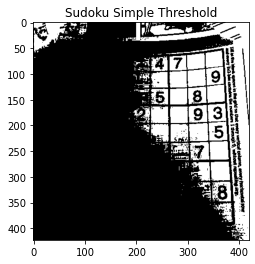

In [4]:
Threshold = 127
Sudoku1 = np.zeros((423,419), np.uint8)
for i in range(423):
    for j in range(419):
        if gray_sudoku[i,j] > Threshold:
            Sudoku1[i,j] = 255       
        else:
            Sudoku1[i,j] = 0
plt.title("Sudoku Simple Threshold")
plt.imshow(cv2.cvtColor(Sudoku1,cv2.COLOR_BGR2RGB))

In [5]:
House2 = np.zeros((768,1024), np.uint8)

startpos=0
Track_bar = "Threshold"
WindowName = "Output Window"
def track_bar(startpos):
    TrackbarPos = cv2.getTrackbarPos(Track_bar, WindowName)
    for i in range(768):
        for j in range(1024):
            if gray_house[i,j] > TrackbarPos:
                House2[i,j] = 255
            else:
                House2[i,j] = 0
    cv2.imshow(WindowName, House2)

def testTrackBar(Image, WindowName):
    cv2.namedWindow(WindowName, cv2.WINDOW_NORMAL)
    cv2.createTrackbar(Track_bar, WindowName, 0, 255, track_bar) 
    cv2.waitKey(0)       
    cv2.destroyAllWindows()
testTrackBar(gray_house, "Output Window")

In [6]:
Sudoku2 = np.zeros((423, 419), np.uint8)
startpos=0
Track_bar = "Threshold"
WindowName = "Output Window"
def track_bar(startpos):
    TrackbarPos = cv2.getTrackbarPos(Track_bar, WindowName)
    for i in range(423):
        for j in range(419):
            if gray_sudoku[i,j] > TrackbarPos:
                Sudoku2[i,j] = 255
            else:
                Sudoku2[i,j] = 0
    cv2.imshow(WindowName, Sudoku2)

def testTrackBar(Image, WindowName):
    cv2.namedWindow(WindowName, cv2.WINDOW_NORMAL)
    cv2.createTrackbar(Track_bar, WindowName, 0, 255, track_bar) 
    cv2.waitKey(0)       
    cv2.destroyAllWindows()
testTrackBar(gray_sudoku, "Output Window")


In [7]:
def tiles(image,step_size): 
    tiles = cv2.cvtColor(image,0)  
    i = 0 
    while i < tiles.shape[1]: 
        j = 0
        while j < tiles.shape[0]: 
            tiles = cv2.rectangle(tiles,(i,j),(i+step_size,j+step_size),(255,0,0),1)
            j += step_size
        i += step_size
    
    return tiles
            
   
    
    

Text(0.5, 1.0, '50x50 Tile Seperated Image')

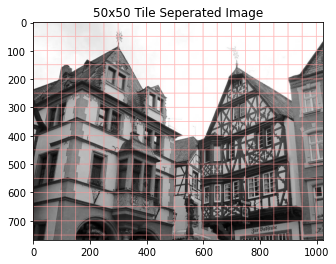

In [8]:
plt.imshow(tiles(gray_house,50), cmap = "gray")
plt.title("50x50 Tile Seperated Image")

Text(0.5, 1.0, '100x100 Tile Seperated Image')

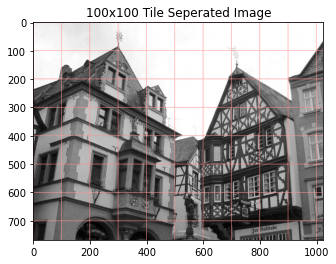

In [9]:
plt.imshow(tiles(gray_house,100), cmap = "gray")
plt.title("100x100 Tile Seperated Image")

In [10]:
def otsuAlgorithm(image):
    otsu_histogram,between = np.histogram(image, np.arange(0,257))
    max_variance_between, threshold_between, threshold_within, min_variance_within = -1,-1,-1,100000
    threshold_values = np.arange(256)
    otsu_historgram = otsu_histogram*(1.0/(image.shape[0]*image.shape[1]))
    
    for threshold in between[1:-1]:
        histogram_sum = np.sum(otsu_histogram) 
        
        if histogram_sum == 0: 
            histogram_sum == 1
        
        probability_back = np.sum(otsu_histogram[:threshold])
        probability_for = np.sum(otsu_histogram[threshold:])
        
        if probability_for == 0:
            probability_for = 1
        if  probability_back == 0:
             probability_back = 1
        
        weighted_back =  probability_back * (1.0/histogram_sum)
        weighted_for = probability_for * (1.0/histogram_sum)
        
        avg_back = np.sum(otsu_histogram[:threshold]*threshold_values[:threshold])/( probability_back)
        avg_for = np.sum(otsu_histogram[threshold:]*threshold_values[threshold:])/(probability_for)
        variance_Between = weighted_back*weighted_for*(avg_back - avg_for)**2
        
        if variance_Between > max_variance_between: 
            threshold_between = threshold
            max_variance_between = variance_Between
        
        variance_back = np.sum([((i - avg_back)**2) 
        for i in range(threshold)]*otsu_histogram[:threshold])/ probability_back
        variance_for = np.sum([((i - avg_for)**2) 
        for i in range(threshold,256)]*otsu_histogram[threshold:])/probability_for 
        variance_weight = (weighted_back*variance_back) + (weighted_for*variance_for)
        if variance_weight < min_variance_within: 
            threshold_within = threshold
            min_variance_within = variance_weight
            
    threshold_image = np.zeros(image.shape,dtype = "uint8")
    if threshold_between > 250: 
        threshold_between = threshold_between - 20
    
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            if image[i,j] < threshold_between: 
                threshold_image[i,j] = 0
            else: 
                threshold_image[i,j] = 255
    return threshold_image


    
def SplitImage(image,size): 
    array = []
    for i in range(0, image.shape[0], size): 
        for j in range(0, image.shape[1], size): 
            
            if i + size > image.shape[0] and j + size > image.shape[1]: 
                section = image[i: i + (image.shape[0]), j: j + (image.shape[1])]
                array.append(section)
                break
                
            elif i + size > image.shape[0] : 
                section = image[i: i + (image.shape[0]), j: j + size]
                array.append(section)
                
            elif i + size > image.shape[1] : 
                section = image[i: i + size, j: j + (image.shape[1])]
                array.append(section)
                
            else:
                section = image[i: i + size, j: j + size]
                array.append(section)
                
    return array           



In [11]:
def otsuThresh(image, size):
    
    SplitImages = SplitImage(image,size)
    blank = np.zeros(image.shape,dtype = "uint8")
    for i in range(len(SplitImages)):
        SplitImages[i] = otsuAlgorithm(SplitImages[i])
    
    k = 0
    for i in range(0, blank.shape[0], size): 
        for j in range(0, blank.shape[1], size): 
            if i + size > blank.shape[0] and j + size > blank.shape[1]: 
                blank[i: i + (blank.shape[0]), j: j + (blank.shape[1])] = SplitImages[k]
                k += 1
                break
            elif i + size > blank.shape[0] : 
                blank[i: i + (blank.shape[0]), j: j + size] = SplitImages[k]
                k += 1
            elif i + size > blank.shape[1] : 
                blank[i: i + size, j: j + (blank.shape[1])] = SplitImages[k]
                k += 1
            else:
                blank[i: i + size, j: j + size] = SplitImages[k]
                k +=1 
                
    return blank

Text(0.5, 1.0, 'House Simple Threshold')

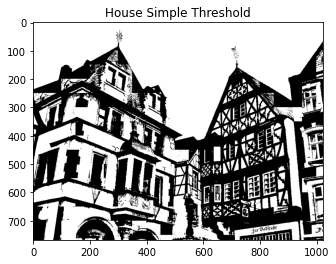

In [12]:
OtsuHouseImage = otsuThresh(gray_house, 50)
plt.imshow(OtsuHouseImage, cmap = 'gray')
plt.title("House Simple Threshold")

Text(0.5, 1.0, 'Sudoku Simple Threshold')

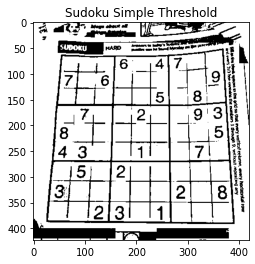

In [13]:
OtsuSudokuImage = otsuThresh(gray_sudoku, 20)
plt.imshow(OtsuSudokuImage, cmap = 'gray')
plt.title("Sudoku Simple Threshold")

Text(0.5, 1.0, 'Open CV Logo')

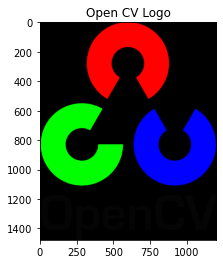

In [14]:
OCVlogo = cv2.imread("OCVLogo.png")
plt.imshow(cv2.cvtColor(OCVlogo,cv2.COLOR_BGR2RGB))
plt.title("Open CV Logo")

In [15]:
def ColorThreshold(image,threshold,DataType,color): 
    Threshold_image = np.zeros(image.shape,dtype = DataType)
    if color == 0:
        for i in range(0, image.shape[0]):
            for j in range(0, image.shape[1]):
                if image[i,j][2] < threshold: 
                    Threshold_image[i,j] = [0,0,0]
                else: 
                    Threshold_image[i,j] = [0,0,255]
    elif color == 1: 
        for i in range(0, image.shape[0]):
            for j in range(0, image.shape[1]):
                if image[i,j][1] < threshold: 
                    Threshold_image[i,j] = [0,0,0]
                else: 
                    Threshold_image[i,j] = [0,255,0]
    else: 
        for i in range(0, image.shape[0]):
            for j in range(0, image.shape[1]):
                if image[i,j][0] < threshold: 
                    Threshold_image[i,j] = [0,0,0]
                else: 
                    Threshold_image[i,j] = [255,0,0]
    return Threshold_image
            

In [16]:
def SeperateChannels(image,shape):
    red = np.zeros(shape,np.uint8)
    green = np.zeros(shape,np.uint8)
    blue = np.zeros(shape,np.uint8)
    
    Row = shape[0]
    Column = shape[1]
            
    for i in range(0,Row):
        for j in range(0, Column):
            pixel = image[i,j]
            red[i,j] = [0,0,pixel[2]]
            
            green[i,j] = [0,pixel[1],0]
            
            blue[i,j] = [pixel[0],0,0]
    
    red = cv2.cvtColor(ColorThreshold(red,127,"uint8",0),cv2.COLOR_BGR2RGB)
    green = cv2.cvtColor(ColorThreshold(green,127,"uint8",1),cv2.COLOR_BGR2RGB)
    blue = cv2.cvtColor(ColorThreshold(blue,127,"uint8",2),cv2.COLOR_BGR2RGB)
            
    return [red,green,blue]

Text(0.5, 1.0, 'OCV Red Segmented')

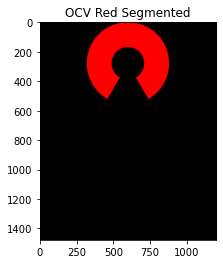

In [17]:
ColorChannels = SeperateChannels(OCVlogo,OCVlogo.shape)
plt.imshow(ColorChannels[0])
plt.title("OCV Red Segmented")

Text(0.5, 1.0, 'OCV Green Segmented')

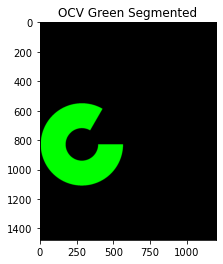

In [18]:
plt.imshow(ColorChannels[1])
plt.title("OCV Green Segmented")

Text(0.5, 1.0, 'OCV Blue Segmented')

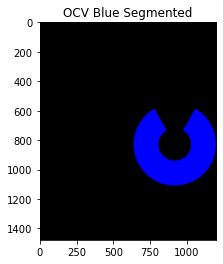

In [19]:
plt.imshow(ColorChannels[2])
plt.title("OCV Blue Segmented")